# A quoi sert ce notebook ?

- pré-traitement des données textuelles ("description")
- vectorisation
- regression logistique à partir de l'unique variable "description"
- ajout de nouvelles variables binaires

In [104]:
#Import des librairies
import pandas as pd
import numpy as np
import unicodedata
import unidecode
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from stop_words import get_stop_words

## Traitement des données

In [105]:
#Lecture des données
df = pd.read_csv("./../data/offers_with_10k_each_contracts.csv")
df.head()

,offer_id,title,description,contract_id,recruiter_id,department_id,industry_id,location,latitude,longitude,created_at
0,620861,Développeur(euse) Android expérimenté(e),LE POSTE\r\nNous mettons aujourd’hui en place ...,1,17524.0,114.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-06-01 10:37:48.322823
1,620862,Ingénieur QA Mobile,LE POSTE\r\nEn tant qu’Ingénieur Qualité Mobil...,1,17524.0,114.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-06-01 10:45:00.950319
2,330503,Vérificateur Documents Techniques Aéronautique...,Technicien Vérificateur Documents Techniques A...,1,NaN,108.0,15.0,Donauwörth,48.735699,10.791800,2015-03-26 04:16:35.620706
3,623978,Chef de Produit Mobile,L’EQUIPE\r\nL’équipe Produit & Innovation poss...,1,17524.0,115.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-07-18 14:04:00.652073
4,391895,Ordonnanceur H/F,"Entreprise :\n\nOPTIMA IP, cabinet de recrutem...",1,NaN,117.0,20.0,"Sucy-en-Brie, France",48.770802,2.538860,2015-05-22 10:38:42.117161


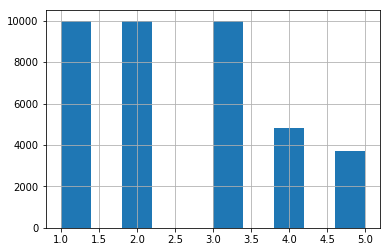

In [106]:
#Répartition des types de contrats
df.contract_id.hist()

In [107]:
#Suppression des échantillons dont la variable contrat est nulle
df = df[df.contract_id.notnull()]          #inutile mais au cas où

In [108]:
#Texte en minuscule et suppression des \n et \r
df['description'] = df['description'].str.lower()
df.description = df.description.replace('\r', ' ', regex=True).replace('\n', ' ', regex=True)

In [109]:
# Dans la variable 'description'
#Remplacement des valeurs NA par ""

df['description'] = [BeautifulSoup(text, "html.parser").get_text() for text in df['description'].fillna("")]

In [110]:
df.head()

,offer_id,title,description,contract_id,recruiter_id,department_id,industry_id,location,latitude,longitude,created_at
0,620861,Développeur(euse) Android expérimenté(e),le poste nous mettons aujourd’hui en place un...,1,17524.0,114.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-06-01 10:37:48.322823
1,620862,Ingénieur QA Mobile,"le poste en tant qu’ingénieur qualité mobile,...",1,17524.0,114.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-06-01 10:45:00.950319
2,330503,Vérificateur Documents Techniques Aéronautique...,technicien vérificateur documents techniques a...,1,NaN,108.0,15.0,Donauwörth,48.735699,10.791800,2015-03-26 04:16:35.620706
3,623978,Chef de Produit Mobile,l’equipe l’équipe produit & innovation possèd...,1,17524.0,115.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-07-18 14:04:00.652073
4,391895,Ordonnanceur H/F,"entreprise : optima ip, cabinet de recrutemen...",1,NaN,117.0,20.0,"Sucy-en-Brie, France",48.770802,2.538860,2015-05-22 10:38:42.117161


In [111]:
#Définition du préprocessor pour supprimer les digits et transformer le texte en minuscule
def my_preprocessor(text):
    return unidecode.unidecode(''.join([letter for letter in text if not letter.isdigit()]).strip().lower())

In [112]:
#Vectorisation

#stop words fr dans stop_words
stop_wordsFR = get_stop_words('french')
stop_wordsFR.extend(['ca', 'debut', 'etaient', 'etais', 'etait', 'etant', 'etat', 'ete', 'etes', 'etiez', 'etions', 'etre', 'eumes', 'eutes', 'fumes', 'futes', 'meme', 'nomme', 'nommee', 'nommes', 'tres'])

vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    analyzer="word",
    binary=False,
    max_features=6000,
    stop_words = stop_wordsFR,
preprocessor=my_preprocessor)


In [113]:
#tfidf fit de cleaned_description

vectorizer.fit(df.description)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=6000, min_df=1,
        ngram_range=(1, 3), norm='l2',
        preprocessor=<function my_preprocessor at 0x000002488D5D17B8>,
        smooth_idf=True,
        stop_words=['a', 'ai', 'aie', 'aient', 'aies', 'ait', 'alors', 'as', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'aux', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', '..., 'etions', 'etre', 'eumes', 'eutes', 'fumes', 'futes', 'meme', 'nomme', 'nommee', 'nommes', 'tres'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [114]:
X = vectorizer.transform(df.description)

In [115]:
print(X)

  (0, 5961)	0.06503901492091345
  (0, 5872)	0.08481713163343119
  (0, 5836)	0.14775352009092893
  (0, 5835)	0.07579671746032397
  (0, 5828)	0.09129635341341341
  (0, 5802)	0.04949485896041194
  (0, 5789)	0.04120462678606829
  (0, 5754)	0.07946354070389837
  (0, 5690)	0.14926458056027905
  (0, 5689)	0.10531045232681774
  (0, 5688)	0.07834768878734137
  (0, 5686)	0.06314929789515945
  (0, 5635)	0.06327887635124034
  (0, 5625)	0.0685387310930467
  (0, 5566)	0.04575647255772641
  (0, 5499)	0.07880137530038547
  (0, 5335)	0.03584911221884353
  (0, 5290)	0.048790620626921535
  (0, 5252)	0.06397673396251528
  (0, 5225)	0.06663175429180818
  (0, 5188)	0.04538284068164484
  (0, 5162)	0.15971434230617593
  (0, 5033)	0.06414545502234369
  (0, 5002)	0.048581553258195166
  (0, 4968)	0.040574747213501614
  :	:
  (38493, 1191)	0.08359155399329521
  (38493, 1175)	0.046599932168934266
  (38493, 1037)	0.08972053125307446
  (38493, 1022)	0.0363718222056445
  (38493, 987)	0.0590528198768021
  (38493, 981)

In [116]:
X.shape

(38494, 6000)

## Regression Logistique

Feature : 'description'

In [117]:
#Séparation du jeu de données en base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df.contract_id, test_size=0.30)

In [118]:
from sklearn.linear_model import LogisticRegression
#Instance d'une régression logistique
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.predict(X_test)

C:\Users\Marine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([1, 3, 5, ..., 2, 3, 2], dtype=int64)

In [119]:
#Matrice de confusion
print("Matrice de confusion : \n", confusion_matrix(y_test, clf.predict(X_test)))

Matrice de confusion : 
 [[2199  530   91  106   75]
 [ 584 2095  105  145   77]
 [  50   27 2855   29    2]
 [ 501  288  174  379  113]
 [ 470  236   80  130  208]]


In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Score
accuracy_score(clf.predict(X_test), y_test)

0.6698415447224868

In [121]:
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           1       0.73      0.58      0.65      3804
           2       0.70      0.66      0.68      3176
           3       0.96      0.86      0.91      3305
           4       0.26      0.48      0.34       789
           5       0.19      0.44      0.26       475

   micro avg       0.67      0.67      0.67     11549
   macro avg       0.57      0.60      0.57     11549
weighted avg       0.73      0.67      0.69     11549



**Testons le Bayes Naive**

In [132]:
#Bayes naive
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.1, fit_prior=True)

clf.fit(X_train, y_train)
print('Score = ', clf.score(X_test, y_test))

Score =  0.5721707507143475


In [134]:
import pandas as pd
CC = pd.crosstab(
    y_test,
    clf.predict(X_test),
    rownames=['True'],
    colnames=['Predicted'],
    margins=True)
CC

Predicted,1,2,3,4,5,All
True,,,,,,
1,1946,556,107,124,268,3001
2,694,1849,132,121,210,3006
3,316,288,2291,43,25,2963
4,514,299,202,226,214,1455
5,446,177,95,110,296,1124
All,3916,3169,2827,624,1013,11549


## Ajout des nouvelles variables

In [129]:
#Avant ajout des nouvelles variables
df.head(3)

,offer_id,title,description,contract_id,recruiter_id,department_id,industry_id,location,latitude,longitude,created_at,contains_cdi,contains_cdd,contains_stage,contains_alternance,contains_apprenti,contains_vie
0,620861,Développeur(euse) Android expérimenté(e),le poste nous mettons aujourd’hui en place un...,1,17524.0,114.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-06-01 10:37:48.322823,0,0,0,0,0,0
1,620862,Ingénieur QA Mobile,"le poste en tant qu’ingénieur qualité mobile,...",1,17524.0,114.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-06-01 10:45:00.950319,0,0,0,0,0,0
2,330503,Vérificateur Documents Techniques Aéronautique...,technicien vérificateur documents techniques a...,1,NaN,108.0,15.0,Donauwörth,48.735699,10.791800,2015-03-26 04:16:35.620706,0,0,0,0,0,0


In [123]:
#Ajout des nouvelles variables
df['contains_cdi'] = df['description'].apply(lambda x: 'cdi' in x).astype(int)
df['contains_cdd'] = df['description'].apply(lambda x: 'cdd' in x).astype(int)
df['contains_stage'] = df['description'].apply(lambda x: 'stage' in x).astype(int)
df['contains_alternance'] = df['description'].apply(lambda x: 'alternance' in x).astype(int)
df['contains_apprenti'] = df['description'].apply(lambda x: 'apprenti' in x).astype(int)
df['contains_vie'] = df['description'].apply(lambda x: 'vie' in x).astype(int)

In [125]:
df

,offer_id,title,description,contract_id,recruiter_id,department_id,industry_id,location,latitude,longitude,created_at,contains_cdi,contains_cdd,contains_stage,contains_alternance,contains_apprenti,contains_vie
0,620861,Développeur(euse) Android expérimenté(e),le poste nous mettons aujourd’hui en place un...,1,17524.0,114.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-06-01 10:37:48.322823,0,0,0,0,0,0
1,620862,Ingénieur QA Mobile,"le poste en tant qu’ingénieur qualité mobile,...",1,17524.0,114.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-06-01 10:45:00.950319,0,0,0,0,0,0
2,330503,Vérificateur Documents Techniques Aéronautique...,technicien vérificateur documents techniques a...,1,NaN,108.0,15.0,Donauwörth,48.735699,10.791800,2015-03-26 04:16:35.620706,0,0,0,0,0,0
3,623978,Chef de Produit Mobile,l’equipe l’équipe produit & innovation possèd...,1,17524.0,115.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-07-18 14:04:00.652073,0,0,0,0,0,0
4,391895,Ordonnanceur H/F,"entreprise : optima ip, cabinet de recrutemen...",1,NaN,117.0,20.0,"Sucy-en-Brie, France",48.770802,2.538860,2015-05-22 10:38:42.117161,0,0,0,0,0,0
5,626090,Consultant stratégie digitale,vous êtes jeune diplômé(e) d’une grande école ...,1,17549.0,119.0,9.0,"Paris, France",48.856614,2.352222,2017-08-28 08:01:28.911562,0,0,0,0,1,0
6,612987,Ingénieur études et développement C# H/F,dans le cadre des projets de développement de ...,1,17561.0,101.0,15.0,"Grenoble, France",45.188529,5.724524,2017-01-10 13:37:17.537197,0,0,0,0,0,0
7,358977,RESPONSABLE BUREAU D'ÉTUDES CÂBLAGE ELECTRIQUE...,entreprise :novajob se veut être le précurseur...,1,NaN,117.0,9.0,"LANGUEDOC ROUSSILL, France",43.593406,3.227784,2015-04-16 08:26:52.143544,0,0,0,0,0,0
8,694642,Responsable Ingénierie QOS,"en 2017, bouygues telecom connait une très for...",1,16826.0,107.0,24.0,13 AVENUE DU MARECHAL JUIN 92360 MEUDON,48.786771,2.220587,2018-08-23 09:38:51.919709,0,0,0,0,0,0
9,565156,Sales Representative,,1,12374.0,103.0,9.0,"1343 East Gun Hill Road, Bronx, NY, United States",40.870953,-73.846569,2016-04-07 13:04:23.503985,0,0,0,0,0,0


In [128]:
print(df.description.loc[12])

votre environnement de travail    la digital rh team ! cette nouvelle équipe, composée de 3 jeunes digital natives, a pour ambition de repenser les pratiques de la fonction rh, version 3.0. les défis à relever ensemble: développer et repenser les outils collaboratifs, faire de nos intranets rh de véritables outils user-friendly et créer une communauté rh collaborative et interactive. vos compagnons de route :    •	vanessa : la superwoman des outils collaboratifs et la créative de l’équipe  •	mélanie : l’experte rh toujours à l’écoute  •	andréa : la spécialiste de la communication et de l’event      vos missions    •	vous participez au développement et au déploiement du nouvel intranet rh  •	vous coachez et accompagnez la communauté rh sur l’utilisation des outils collaboratifs (animation de workshops, création de tutoriels)  •	en collaboration avec l’équipe recrutement, vous mettez en place les nouveaux outils visant à améliorer l’expérience candidat (process de recrutement, parcours d

**Problème : offres mal classées**

In [136]:
#Concaténation des features

#Voir :
#class sklearn.pipeline.FeatureUnion(transformer_list, n_jobs=None, transformer_weights=None)

#features = X + df['contains_cdi', 'contains_cdd', 'contains_stage', 
  #                'contains_alternance', 'contains_apprenti', 'contains_vie']

In [139]:
print(df.contract_id[30017], df.title[30017])

4  Apprenti(e) Assistant(e) administratif


**TO DO :**

- concaténer les features
- regression logistique sur les nouvelles variables
- améliorer le modèle (par ex: compter le nombre de fois que "cdi" est répété
